# Assignment - 3

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [117]:
local_img_path = 'testing 4.jpg'

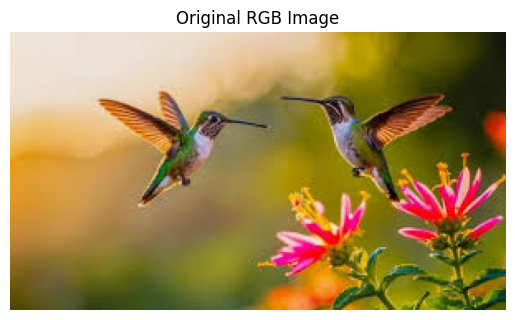

In [118]:
img_bgr = cv2.imread(local_img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

#### Part A
Task 1 - Convolution
- Write a function convolve(img, kernel) Hint : Lookup np.pad function for padding and research how it works. It takes different modes, one that we want to use is reflect Also, learn what exactly * does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

In [119]:

def convolve(img, kernel):

    k = kernel.shape[0]
    pad = k // 2
    # Pad image using reflect mode
    img_padded = np.pad(img, pad, mode='reflect')
    H, W = img.shape
    output = np.zeros((H, W))
    # Slide kernel over image
    for i in range(H):
        for j in range(W):
            region = img_padded[i:i+k, j:j+k]
            output[i, j] = np.sum(region * kernel)
    
    return output


Why * works here?
- region and kernel are same size
- this * = element-wise multiplication

Task 2 — Average Blur
* Implement a function average_blur_gray(img, ksize) using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)


In [120]:
def average_blur_gray(img, ksize):
    kernel = np.ones((ksize, ksize)) / (ksize * ksize)
    blurred = convolve(img, kernel)
    return blurred


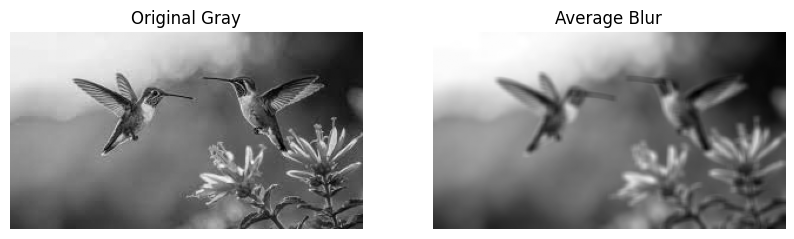

In [121]:
img_gray = np.mean(img_rgb, axis=2)
avg_blur = average_blur_gray(img_gray, 5)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(avg_blur, cmap='gray')
plt.title("Average Blur")
plt.axis("off")

plt.show()


- Repeat for RGB:
*  Apply the kernel on each channel separately.


In [122]:
def average_blur_rgb(img, ksize):
    output = np.zeros_like(img)
    
    for c in range(3):
        output[:,:,c] = average_blur_gray(img[:,:,c], ksize)
    
    return output


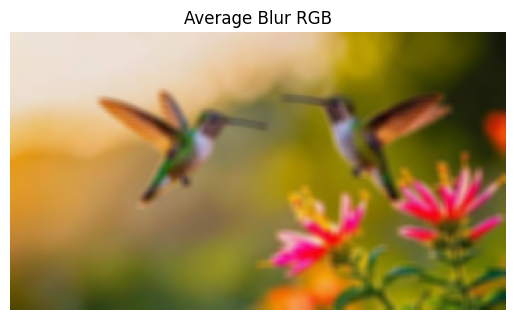

In [123]:
avg_blur_rgb = average_blur_rgb(img_rgb, 5)

plt.imshow(avg_blur_rgb.astype(np.uint8))
plt.title("Average Blur RGB")
plt.axis("off")
plt.show()


Task 3 - Gaussian Blur
Implement a Gaussian kernel generator: The function signature should be gaussian_kernel(ksize, sigma) It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

Convolve it with:

Gray image
Each RGB channel
And, then display all results along with the original image.

In [124]:
def gaussian_kernel(ksize, sigma):
    ax = np.arange(-ksize//2 + 1., ksize//2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)
    
    return kernel


In [125]:
g_kernel = gaussian_kernel(5, 1.0)
gauss_gray = convolve(img_gray, g_kernel)
gauss_rgb = np.zeros_like(img_rgb)

for c in range(3):
    gauss_rgb[:,:,c] = convolve(img_rgb[:,:,c], g_kernel)


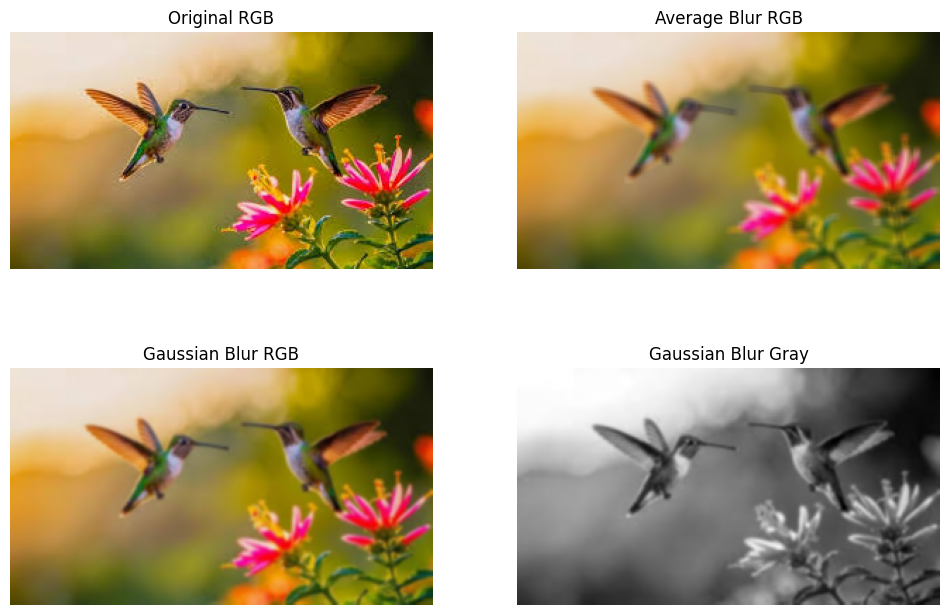

In [126]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(avg_blur_rgb.astype(np.uint8))
plt.title("Average Blur RGB")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(gauss_rgb.astype(np.uint8))
plt.title("Gaussian Blur RGB")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(gauss_gray, cmap='gray')
plt.title("Gaussian Blur Gray")
plt.axis("off")

plt.show()


### Part B
#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.
Compute:
1. Gx
2. Gy
3. Gradient magnitude
Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

- Step 0: What Sobel Does (Very Simple)
- Sobel finds edges by measuring intensity change:
- Gx → vertical edges (left–right change)
- Gy → horizontal edges (top–bottom change)
- Then we combine them to get edge strength.

In [127]:
# Sobel kernel in x-direction
sobel_x = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
])

# Sobel kernel in y-direction
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])


In [128]:
Gx = convolve(img_gray, sobel_x)
Gy = convolve(img_gray, sobel_y)
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
gradient_magnitude = gradient_magnitude / gradient_magnitude.max()
gradient_magnitude = (gradient_magnitude * 255).astype(np.uint8)



In [129]:
# Thresholding to keep strong edges only
threshold = 80  # chosen empirically
edge_map = np.zeros_like(gradient_magnitude)
edge_map[gradient_magnitude > threshold] = 255


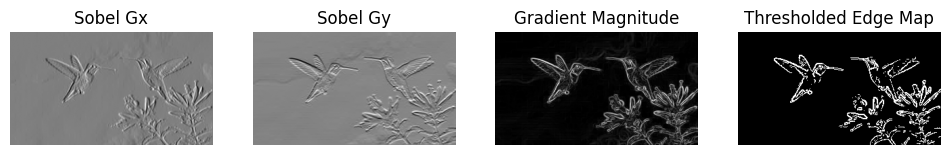

In [130]:
plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.imshow(Gx, cmap='gray')
plt.title("Sobel Gx")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(Gy, cmap='gray')
plt.title("Sobel Gy")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(edge_map, cmap='gray')
plt.title("Thresholded Edge Map")
plt.axis("off")

plt.show()


#### Part C
Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
- lap = convolve(img, laplacian_kernel)
- sharp = img - lap * alpha where alpha ∈ [0.2, 1].
3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

Laplacian detects second-order intensity changes
It highlights edges and fine details
Sharpening is done by subtracting Laplacian from original image



In [131]:
img_gray = np.mean(img_rgb, axis=2)
img_gray = img_gray.astype(np.float32)


In [132]:
laplacian_kernel = np.array([      # choose a 3×3 Laplacian Kernel
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])


In [133]:
lap = convolve(img_gray, laplacian_kernel) #Compute Laplacian (NumPy Only)


In [134]:
alpha = 0.5
sharp_alpha = img_gray - alpha * lap
sharp_alpha = np.clip(sharp_alpha, 0, 255)



In [135]:
alpha = 1.0
sharp_alpha_1 = img_gray - alpha * lap
sharp_alpha_1 = np.clip(sharp_alpha_1, 0, 255)


Laplacian Sharpening Using cv2

In [136]:


lap_cv = cv2.Laplacian(img_gray, cv2.CV_32F)
sharp_cv = img_gray - lap_cv
sharp_cv = np.clip(sharp_cv, 0, 255)
difference = np.abs(sharp_alpha_1 - sharp_cv)
print("Maximum difference:", difference.max())
np.allclose(sharp_alpha_1, sharp_cv)




Maximum difference: 255.0


False

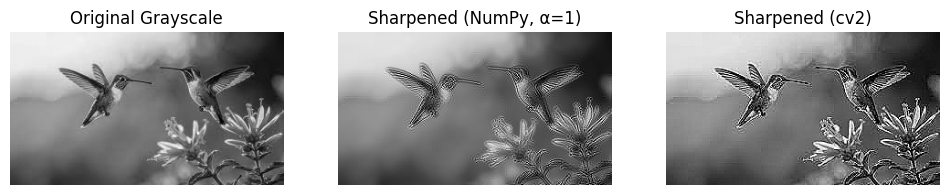

In [137]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sharp_alpha_1, cmap='gray')
plt.title("Sharpened (NumPy, α=1)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(sharp_cv, cmap='gray')
plt.title("Sharpened (cv2)")
plt.axis("off")

plt.show()


Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: mask = img - blurred
3. Add scaled mask back: sharp = img + alpha * mask , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.



Despite the name, unsharp masking sharpens an image.
Idea:
- Blur the image → remove details
- Subtract blur from original → get details (mask)
- Add details back → sharpen image


In [138]:
img_gray = img_gray.astype(np.float32)
ksize = 5
sigma = 1.0

g_kernel = gaussian_kernel(ksize, sigma)   #Apply Gaussian Blur 
blurred = convolve(img_gray, g_kernel)

# Compute mask
mask = img_gray - blurred



In [139]:
# Add Scaled Mask Back (Sharpening)
alpha = 0.7   # sharpening strength
sharp = img_gray + alpha * mask
sharp = np.clip(sharp, 0, 255)

alpha_neg = -0.5         # Negative Alpha means Blurring Effect 
blur_from_unsharp = img_gray + alpha_neg * mask
blur_from_unsharp = np.clip(blur_from_unsharp, 0, 255)



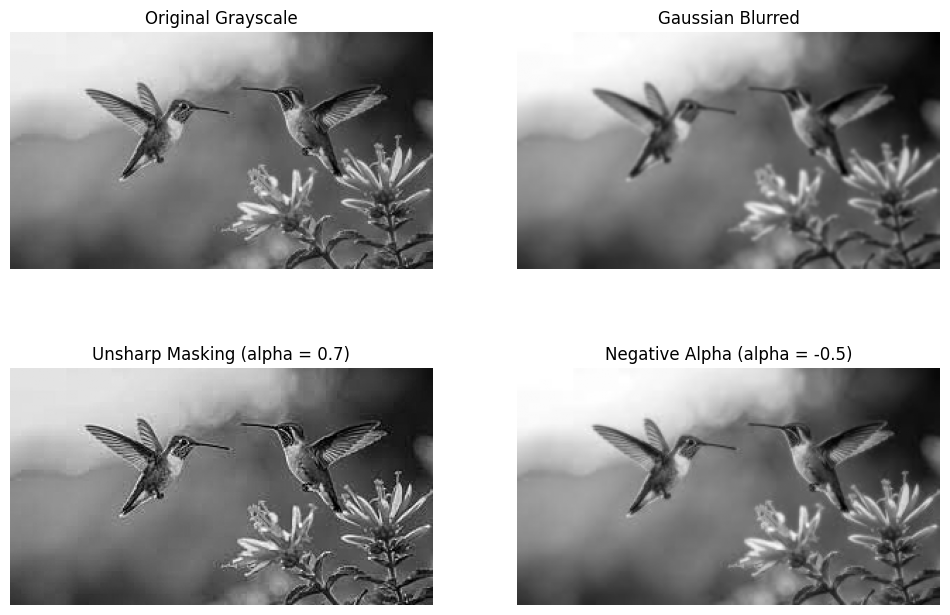

In [140]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(sharp, cmap='gray')
plt.title("Unsharp Masking (alpha = 0.7)")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(blur_from_unsharp, cmap='gray')
plt.title("Negative Alpha (alpha = -0.5)")
plt.axis("off")

plt.show()


### Part D
Task - Frequency Analysis (LPF & HPF Verification)
- Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes. Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel

In [141]:
def magnitude_spectrum(img):
    # Computes log magnitude spectrum of an image
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = np.log(1 + np.abs(fshift))
    return magnitude

mag_original = magnitude_spectrum(img_gray)  #Compute Magnitude Spectrum of Original Image 


In [142]:
# Gaussian Blur (Low Pass Filtering)
g_kernel = gaussian_kernel(9, 2.0)
blurred = convolve(img_gray, g_kernel)

mag_blur = magnitude_spectrum(blurred)



 In the magnitude spectrum of the blurred image,
- the center (low frequencies) is bright,
-  while the outer regions (high frequencies) are dark.
- This confirms that Gaussian blur suppresses high frequencies
-  and preserves only low-frequency components (LPF behavior).


In [143]:
# Unsharp masking
mask = img_gray - blurred
alpha = 1.0
sharp = img_gray + alpha * mask
sharp = np.clip(sharp, 0, 255)
mag_sharp = magnitude_spectrum(sharp)


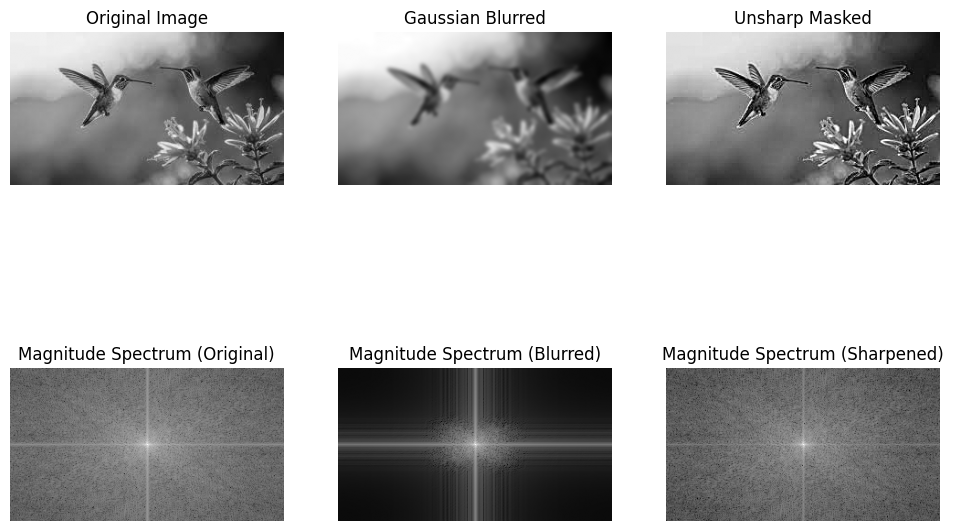

In [144]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(sharp, cmap='gray')
plt.title("Unsharp Masked")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(mag_original, cmap='gray')
plt.title("Magnitude Spectrum (Original)")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(mag_blur, cmap='gray')
plt.title("Magnitude Spectrum (Blurred)")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(mag_sharp, cmap='gray')
plt.title("Magnitude Spectrum (Sharpened)")
plt.axis("off")

plt.show()



 - Center of magnitude spectrum → Low frequencies (smooth regions)
 - Corners / outer regions → High frequencies (edges, texture)
Dark regions → suppressed frequencies
Bright regions → amplified frequencies


### Part E
Task - Custom Colour Kernel (Detect Yellow Leaf Edges)
Instructions :At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.
Hints :

Yellow = (R high, G high, B low)
Dark green = (G high, R low, B low)

Steps:Analyze the RGB values of green & yellow regions.
Create a custom kernel that responds strongly to change from green to yellow in:
Red matrices of RGB
Green matrices of RGB
Optionally R - G difference


Yellow   → R high, G high, B low
Green    → G high, R low, B low
So the biggest change when going Green → Yellow is:
 Red channel increases a lot
 Green stays high
 Blue remains low
Therefore, the difference (R − G) changes significantly at the boundary.

In [145]:
local_image_path_2 = 'leaf_image.jpeg'

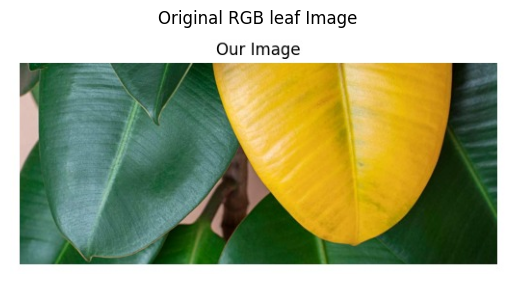

In [146]:
img_bgr_2 = cv2.imread(local_image_path_2)
img_rgb_2= cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb_2)
plt.title("Original RGB leaf Image")
plt.axis("off")
plt.show()

In [147]:
R = img_rgb_2[:,:,0].astype(np.float32)
G = img_rgb_2[:,:,1].astype(np.float32)
B = img_rgb_2[:,:,2].astype(np.float32)
RG_diff = R - G

In [148]:
# This kernel highlights strong local intensity changes
# Suitable for detecting colour transitions

edge_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
RG_edges = convolve(RG_diff, edge_kernel)
R_edges = convolve(R, edge_kernel)

# Red channel responds strongly near yellow leaf edges
combined_response = RG_edges + 0.5 * R_edges



In [149]:
combined_response = np.abs(combined_response)
combined_response = combined_response / combined_response.max()
combined_response = (combined_response * 255).astype(np.uint8)

threshold = 80
yellow_leaf_edges = np.zeros_like(combined_response)
yellow_leaf_edges[combined_response > threshold] = 255


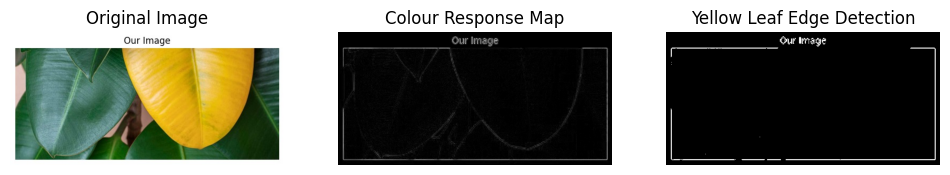

In [150]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(img_rgb_2)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(combined_response, cmap='gray')
plt.title("Colour Response Map")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(yellow_leaf_edges, cmap='gray')
plt.title("Yellow Leaf Edge Detection")
plt.axis("off")

plt.show()
